In numerous problems, the measured data vectors are high dimensional and there are reasons to assume that the data lie near a lower dimensional manifold. High dimensional data is regarded are regarded as multiple, indirect measurements of an underlying source which cannot be directly measured. Learning a suitable low dimensional manifold from high dimensional data is essentially the same as learning this underlying source.

**Dimensionality reduction**- also known as manifold learning is a process of deriving a set of degrees of freedom which can be used to reproduce most of the variability of the data set.

Manifold learning/ Data dimensionality reduction techniques are used primarily for :

- Data Dimensionality reduction : Producing a compact low dimensional encoding of a given high dimensional dataset

- Data Visualization : providing an interpretation of a given data set in terms of intrinsic degree of freedom, usually as a byproduct of data dimensionality reduction.

- Preprocessing for supervised learning : simplifying, reduction and cleaning of data for subsequent machine learning algorithms as this speeds up training processes

High dimensional datasets are at risk of being very sparse i.e, most training instances are likely to be far away from each other meaning that any new instance will likely be far away from any training instance, making predictions much less reliable in lower dimensions sicne they will be based on much larger extrapolations. The more dimensions a training set has, the greater the risk of overfitting it. Theoretically speaking, the solution to dimensionality could be to increase the size of the training set to reach a sufficient density of training instances, unfortunately, in practise, the number of training instances required to reach a given density grows exponentially with the number of dimensions.

Main Approaches to Dimensionality reduction are:

- **Projection** - involves projecting training instances to a much lower dimensional subspace of the high dimensional subspace.

- **Manifold Learning**- is based on the manifold hypothesis that states that high dimensional data tend to lie in the vicinity of a low dimensional manifold or the data generating distribution is assumed to cocnentrate near regions of low dimensionality.Manifold learning seeks a differential algebraic structure in the state space to be inferred from teh sampled data point clouds.

### Principal Component Analysis

First identifies the hyperplane that lies clost to a  linear subspace of the high dimensional space and then projects the data onto it(the axis that preserves the maximum amount of variance, leading to loss of the least amount of information or the axis that minimizes the the mean squared distance between the original dataset and its projection onto that axis).

The principal component of a training set is found through Singular Value Decomposition. Singular Value Decomposition of a matrix is the factorization of A into the product of three matrices $A = UDV^T$ where teh columns of U and V are orthornomal and the matrix D is diagonal with positive real entries.

$$ V^T = ( c_1 c_2...  .c_n)$$

In [2]:
import warnings; warnings.simplefilter("ignore")
#importing important libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as  sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import csv

# datafile upload and data preparation
df = pd.read_csv("diffreport3.csv", sep= ",")

d1 = df.drop("name", axis = 1)
d2 = d1.drop("isotopes", axis = 1)
d3 = d2.drop("adduct", axis = 1)
d4 = d3.drop("tstat", axis = 1)
d5 = d4.drop("pvalue", axis = 1)
d6 = d5.drop("fold", axis = 1)
d7 = d6.drop(d6.columns[0], axis = 1)
d8 = d7.drop("npeaks", axis = 1)
d9 = d8.drop("Eta6", axis = 1)
d10 = d9.drop("Eta8", axis = 1)
columns = ['Eta6_0', 'Eta6_2', 'Eta6_3', 'Eta8.1', 'Eta82', 'Eta83', 'Seq_ID']
df1 = pd.DataFrame(d10, columns = columns)

#making a smaller dataset for test purposes
df1 = df1[0:200]

# creation of train and testing sets

def get_train_test(df, y_col, x_cols, ratio):

    mask = np.random.rand(len(df)) > ratio
    df_train = df[mask]
    df_test = df[~mask]
       
    Y_train = df_train[y_col].values
    Y_test = df_test[y_col].values
    X_train = df_train[x_cols].values
    X_test = df_test[x_cols].values
    return df_train, df_test, X_train, Y_train, X_test, Y_test
 
y_col = 'Seq_ID'
x_cols = list(df1.columns.values)
x_cols.remove(y_col)
 
train_test_ratio = 0.7
df_train, df_test, X_train, Y_train, X_test, Y_test = get_train_test(df1, y_col, x_cols, train_test_ratio)

In [8]:
# Singular Value Decomposition via Numpy

X_centered = X_train -X_train.mean(axis = 0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:,1]

Projecting the training set down to d dimensions

$$X_{d-proj} = X.W_d$$

In [9]:
W2 = V.T[:, :2]
X2D= X_centered.dot(W2)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_train)

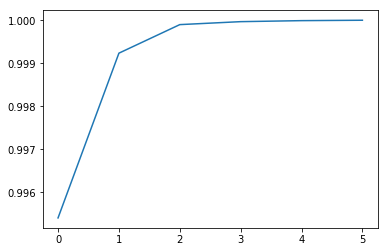

In [12]:
# the following code computes PCA without reducing dimensionality and then computes the minimum number of dimensions required to preserve 95% of the training sets variance

pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

#plot the number of dimensions 

plt.plot(cumsum)
plt.show()

**Reconstruction Error**- is the mean squared distance between the original data and the reconstructed data (compressed and then decompressed) 

In [14]:
pca = PCA(n_components = 3)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

PCA Inverse transformation, back to the original number of dimensions

$$X_{recovered} = X_{d_proj} * W_d^T$$

Incremental PCA - splits the training set into mini-batches and then sequentially applies PCA, avoiding the need to load the whole data set in memory in order to run the SVD Algorithm

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches= 100
inc_pca = IncrementalPCA(n_components = 2)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

    X_reduced = inc_pca.transform(X_train)
    
#alternatively, one could use  Numpy's memmap class which allows one to manipulate a large array stored in a binary file

X_mm = np.memmap(filename, dtype = "float32", mode = "readonly", shape = (m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components = 2, batch_size = batch_size)
inc_pca.fit(X_mm)

# Randomized PCA

rnd_pca = PCA(n_components = 3, svd_solver = "randomized")
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA

A linear decision boundary in the high dimensional feature space corresponds to a complex non-linear decision boundary in the original space. Kernel PCA allows one to make complex non-linear projections for dimensionality reduction and is perfect for preserving clusters of instances after projection.

In [19]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X_train)

In [ ]:
# Using GridSearch to find the best kernel and gamma values

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf= Pipeline([
    ("kpca", KernelPCA(n_components = 2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
            "kpca__gamma":np.linspace(0.03, 0.05, 10),
            "kpca__kernel":["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf,param_grid, cv = 3)
grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)

In [23]:
# reconstruction pre-image

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.043,
                   fit_inverse_transform = True)
X_reduced = rbf_pca.fit_transform(X_train)
X_preimage = rbf_pca.inverse_transform(X_reduced)

#computing reconstruction image

from sklearn.metrics import mean_squared_error
mean_squared_error(X_train, X_preimage)

93408862238397904.0

**Locally Linear Embedding** - is a manifold learning  eigenvector method for non linear dimensionality reduction that computes low dimensional, neighbourhood preserving embeddings of high dimensional inputs.Unlike clustering, LLE maps its inputs into a single global coordinate system of lower dimensionality and its optimizations do not involve local minima.

*Step 1: Linearly modelling local relationships*
$$ \hat{W} = argmin_W \sum\limits_{i =1} ^{m} \lvert\lvert x^{(i)}\sum\limits_{j =1} ^{m}\hat{w}_{i, j} z^{(j)}\rvert\rvert^2$$ 

*Reducing dimensionality while preserving relationships*

$$ \hat{W} = argmin_Z\sum\limits_{i =1} ^{m} \lvert\lvert z^{(i)} \sum\limits_{j =1} ^{m}\hat{w}_{i, j} z^{(j)}\rvert\rvert^2$$

In [25]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X_train)

**Multidimensional Scaling** - computes embeddings that attempt to preserve pairwise distances or generalized disparities between data points.

**Isomap ** - computes embeddings by creating a graph that connects each instance to its nearest neighbours, then reduces dimensionality while trying to preserve geodesic distances between instances.

**t-Distributed Stochastic Neighbour Embedding** - encodes  small neighbourhood relationships in the high dimensional space and in the embedding as probability distributions. The embeddings are defined via an iterative minimization of the loss of information when placing the point in the embedding.

**Linear Discriminant Analysis** - is a learning algorithm that elucidates the most discriminant axes between classes and uses the axes to define a hyperplane onto which  to project the data, keeping classes as far apart as possible.
